## Downloading Data

In [ ]:
!gdown https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip

Downloading...
From: https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
To: /content/rps.zip
100% 201M/201M [00:05<00:00, 38.3MB/s]


In [ ]:
!gdown https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip

Downloading...
From: https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
To: /content/rps-test-set.zip
100% 29.5M/29.5M [00:01<00:00, 22.5MB/s]


In [ ]:
!unzip /content/rps-test-set.zip

Archive:  /content/rps-test-set.zip
replace rps-test-set/paper/testpaper01-00.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip /content/rps.zip

Archive:  /content/rps.zip
   creating: rps/paper/
  inflating: rps/paper/paper01-000.png  
  inflating: rps/paper/paper01-001.png  
  inflating: rps/paper/paper01-002.png  
  inflating: rps/paper/paper01-003.png  
  inflating: rps/paper/paper01-004.png  
  inflating: rps/paper/paper01-005.png  
  inflating: rps/paper/paper01-006.png  
  inflating: rps/paper/paper01-007.png  
  inflating: rps/paper/paper01-008.png  
  inflating: rps/paper/paper01-009.png  
  inflating: rps/paper/paper01-010.png  
  inflating: rps/paper/paper01-011.png  
  inflating: rps/paper/paper01-012.png  
  inflating: rps/paper/paper01-013.png  
  inflating: rps/paper/paper01-014.png  
  inflating: rps/paper/paper01-015.png  
  inflating: rps/paper/paper01-016.png  
  inflating: rps/paper/paper01-017.png  
  inflating: rps/paper/paper01-018.png  
  inflating: rps/paper/paper01-019.png  
  inflating: rps/paper/paper01-020.png  
  inflating: rps/paper/paper01-021.png  
  inflating: rps/paper/paper01-022.png  
  infl

In [ ]:
!rm /content/rps-test-set.zip

In [ ]:
!rm /content/rps.zip

In [ ]:
!unzip /content/validation.zip

Archive:  /content/validation.zip
   creating: validation/
   creating: validation/paper/
  inflating: validation/paper/paper-hires1.png  
  inflating: validation/paper/paper-hires2.png  
  inflating: validation/paper/paper1.png  
  inflating: validation/paper/paper2.png  
  inflating: validation/paper/paper3.png  
  inflating: validation/paper/paper4.png  
  inflating: validation/paper/paper5.png  
  inflating: validation/paper/paper6.png  
  inflating: validation/paper/paper7.png  
  inflating: validation/paper/paper8.png  
  inflating: validation/paper/paper9.png  
   creating: validation/rock/
  inflating: validation/rock/rock-hires1.png  
  inflating: validation/rock/rock-hires2.png  
  inflating: validation/rock/rock1.png  
  inflating: validation/rock/rock2.png  
  inflating: validation/rock/rock3.png  
  inflating: validation/rock/rock4.png  
  inflating: validation/rock/rock5.png  
  inflating: validation/rock/rock6.png  
  inflating: validation/rock/rock7.png  
  inflating: v

## Importing Libraries

In [ ]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

## Loading and Preparing data

In [ ]:
train_dir = '/content/rps'
val_dir = '/content/validation'
test_dir = '/content/rps-test-set'

paper_dir = os.path.join(train_dir, 'paper')
rock_dir = os.path.join(train_dir, 'rock')
scissors_dir = os.path.join(train_dir, 'scissors')


In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2
    )

validation_datagen = ImageDataGenerator(rescale=1.0/255)

test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
BATCH_SIZE = 32
TARGET_SIZE = 64
EPOCHS = 10

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(TARGET_SIZE, TARGET_SIZE), 
                                                    batch_size=BATCH_SIZE, 
                                                    shuffle=True,
                                                    class_mode='categorical')
val_generator = validation_datagen.flow_from_directory(val_dir,
                                                       target_size=(TARGET_SIZE, TARGET_SIZE), 
                                                       batch_size=BATCH_SIZE, 
                                                       shuffle=True,
                                                       class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                       target_size=(TARGET_SIZE, TARGET_SIZE), 
                                                       batch_size=BATCH_SIZE, 
                                                       shuffle=True,
                                                       class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 33 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## Question a and 
## Defining models

### Question a
Build a CNN model with the following specifications:<br>
-- Input shape must be 64 x 64.<br>
-- No of filters in the first convolution layer = 64, Kernel size = 3 x 3<br>
-- No. of filters in the second convolution layer = 32, kernel size = 3 x 3 <br>
-- No of filters in the third convolution layer = 16, kernel size = 3 x 3<br>
-- Use one fully connected layer with 128 neurons.<br>
-- Use a max pooling layer after each convolution layer.<br>
-- Use ReLu as activation function in the convolution and fully connected layers.<br>
-- Assume the remaining parameters.<br>

In [ ]:
#defining custom cnn model
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 16)         0

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    verbose=1)

Epoch 1/10
79/79 [==============================] - 22s 242ms/step - loss: 0.6787 - accuracy: 0.6988 - val_loss: 0.3211 - val_accuracy: 0.8485
Epoch 2/10
79/79 [==============================] - 17s 219ms/step - loss: 0.0936 - accuracy: 0.9754 - val_loss: 0.1475 - val_accuracy: 0.9091
Epoch 3/10
79/79 [==============================] - 13s 168ms/step - loss: 0.0329 - accuracy: 0.9913 - val_loss: 0.1480 - val_accuracy: 0.9091
Epoch 4/10
79/79 [==============================] - 11s 141ms/step - loss: 0.0225 - accuracy: 0.9956 - val_loss: 0.1889 - val_accuracy: 0.9697
Epoch 5/10
79/79 [==============================] - 11s 141ms/step - loss: 0.0241 - accuracy: 0.9921 - val_loss: 0.1038 - val_accuracy: 0.9697
Epoch 6/10
79/79 [==============================] - 11s 143ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.0890 - val_accuracy: 0.9697
Epoch 7/10
79/79 [==============================] - 12s 150ms/step - loss: 0.0076 - accuracy: 0.9984 - val_loss: 0.1192 - val_accuracy: 0.9697

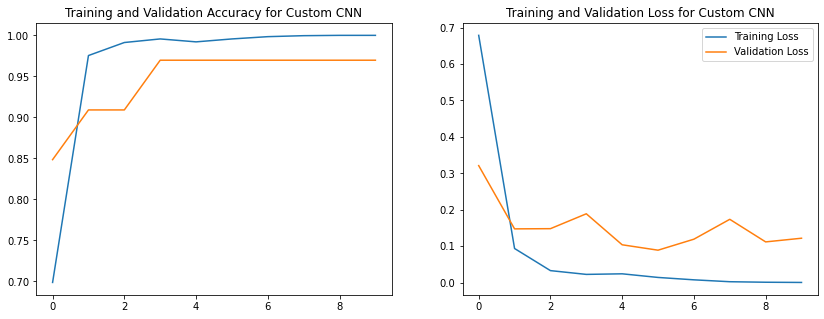

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Custom CNN')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss for Custom CNN')

plt.show()

In [ ]:
loss, acc = model.evaluate(test_generator)

12/12 [==============================] - 1s 107ms/step - loss: 0.6946 - accuracy: 0.8602


In [ ]:
print(f"Loss: {loss}", f"Accuracy: {acc*100}", sep = '\n')

Loss: 0.6946236491203308
Accuracy: 86.02150678634644


### Question b
Build a custom CNN model by using the pretrained VGG-16 model. Replace the fully 
connected layers of VGG-16 by a single fully connected layer with 128 neurons

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
model1 =  VGG16(input_shape = (64,64,3), weights="imagenet", include_top=False)

In [ ]:
model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
x = model1.output
x = Flatten()(x)
next = Dense(128, activation='relu')(x)
predictions = (Dense(3, activation='softmax'))(next)

In [ ]:
from tensorflow.keras import Model

In [ ]:
final_model = Model(inputs=model1.input, outputs=predictions)

In [ ]:
final_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history1 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    verbose=1)

Epoch 1/10
79/79 [==============================] - 12s 147ms/step - loss: 3.4841e-04 - accuracy: 1.0000 - val_loss: 0.0934 - val_accuracy: 0.9697
Epoch 2/10
79/79 [==============================] - 11s 144ms/step - loss: 7.9758e-05 - accuracy: 1.0000 - val_loss: 0.1280 - val_accuracy: 0.9697
Epoch 3/10
79/79 [==============================] - 11s 142ms/step - loss: 4.8232e-05 - accuracy: 1.0000 - val_loss: 0.1022 - val_accuracy: 0.9697
Epoch 4/10
79/79 [==============================] - 11s 143ms/step - loss: 9.6215e-05 - accuracy: 1.0000 - val_loss: 0.0951 - val_accuracy: 0.9697
Epoch 5/10
79/79 [==============================] - 11s 144ms/step - loss: 3.7581e-05 - accuracy: 1.0000 - val_loss: 0.0925 - val_accuracy: 0.9697
Epoch 6/10
79/79 [==============================] - 11s 143ms/step - loss: 2.7009e-04 - accuracy: 1.0000 - val_loss: 0.0918 - val_accuracy: 0.9394
Epoch 7/10
79/79 [==============================] - 13s 164ms/step - loss: 1.0096e-04 - accuracy: 1.0000 - val_loss: 0

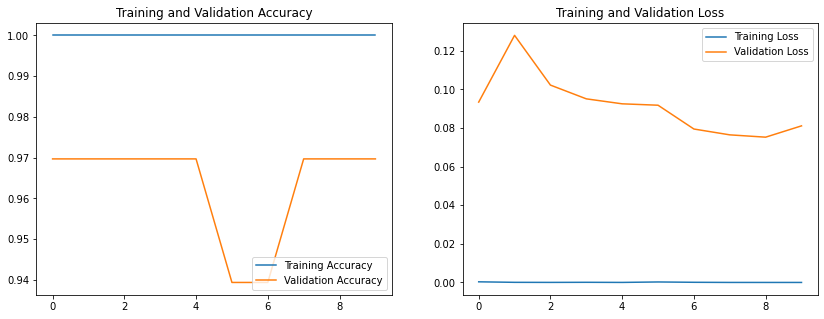

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
loss, acc = final_model.evaluate(test_generator)

12/12 [==============================] - 3s 130ms/step - loss: 1.1237 - accuracy: 0.4032


In [ ]:
print(f"Loss: {loss}", f"Accuracy: {acc*100}", sep = '\n')

Loss: 1.1237457990646362
Accuracy: 40.32258093357086


### Question c
Compare and comment on the training, validation and testing performances of 
models mentioned in a) and b) by plotting the accuracy and loss curves. Also compare 
and comment on the confusion matrices for the test data for the models a) and b)<br>
Plots are given above!!

Training, Validation and Test Preformance
<br>
For our custom model:<br>
Training:<br>
Loss: 4.3527e-04 Accuracy: 1.0000 <br>
Validation:<br>
Loss: 0.1218 Accuracy: 0.9697<br>
Testing:<br>
Loss: 0.6946236491203308 Accuracy: 86.02150678634644<br>

<br>
For pretrained VGG<br>
Training:<br>
Loss: 2.1406e-05 Accuracy: 1.0000 <br>
Validation:<br>
Loss: 0.0811 - Accuracy: 0.9697<br>
Testing:<br>
Loss: 1.1237457990646362 Accuracy: 40.32258093357086

We find that our models do comparativel;y similar on the training data however VGG16 fails to genralise onto our test data

#### Confusion Matrices on test data

In [ ]:
true_labels = test_generator.labels

In [ ]:
model_preds = model.predict(test_generator)

12/12 [==============================] - 1s 99ms/step


In [ ]:
final_model_preds = final_model.predict(test_generator)

12/12 [==============================] - 2s 143ms/step


In [ ]:
from tensorflow.math import confusion_matrix

Matrix for custom model

In [ ]:
model_preds = model_preds.argmax(axis = 1)

In [ ]:
confusion_matrix(true_labels, model_preds)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[41, 42, 41],
       [46, 39, 39],
       [45, 50, 29]], dtype=int32)>

Matrix for VGG16 model

In [ ]:
final_model_preds = final_model_preds.argmax(axis = 1)
confusion_matrix(true_labels, final_model_preds)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[90,  0, 34],
       [91,  0, 33],
       [96,  0, 28]], dtype=int32)>

We find that the VGG model does not predict any single image as rock as compared to the custom model which causes the re4duction in accuracy of our model.